<a href="https://colab.research.google.com/github/SUMIT2925/Netflix-Data-Exploration-and-Visualisation/blob/main/Business_Case_Netflix_Sumit_Awasthi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Business Case: Netflix - Data Exploration & Visualisation

# Business Problem
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

# This dataset consists of a list of all the TV shows/movies available on Netflix :-

* Show_id : Unique ID for every Movie / Tv Show
* Type : Identifier - A Movie or TV Show
* Title : Title of the Movie / Tv Show
* Director : Director of the Movie
* Cast : Actors involved in the movie/show
* Country : Country where the movie/show was produced
* Date_added : Date it was added on Netflix
* Release_year : Actual Release year of the movie/show
* Rating : TV Rating of the movie/show
* Duration : Total Duration - in minutes or number of seasons
* Listed_in : Genre
* Description : The summary description




In [ ]:
# importing various libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # To ignore the warnings & improve the readability of our code
warnings.filterwarnings("ignore")

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/netflix.csv")
df

*  It is necessary to pre-process which involves unnesting the data contained in the 'Title,' 'Director,' 'Cast,' and 'Listed_in' columns.
* Additionally  'Duration' column should be handled because it contains the information in minutes for movies and in seasons for TV shows.

In [ ]:
df.shape # To observe shape of data

(8807, 12)

Over 8807 rows are spread across 12 columns in the dataset. A cursory glance at the data frames appears to be a standard movie/TV show data frame without ratings. It is also evident that certain columns have NaN values.
To improve the accuracy of the analysis, we will need to clean the dataset because the data frames contain a large number of NaN values.


In [ ]:
df.info() # To observe the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Statistical Summary

In [ ]:
df.describe()  # To generate statistical summary of numerical column

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include = object) # Statistical summary of categorical column

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,3207,1793,362,4


**Conclusion :-**

* Show_id and Title contain unique values and hence it can be used as index columns.
* "Type" and "rating" can be directly convert as categorical data and other can be convert after unnesting accept date_added, description and duration.

# Missing Value Detection

In [ ]:
df.isnull().sum() # Missing or null values in data

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

* As we can see, a lot of records in the data doesn't have values in Director, Cast and Country columns.

In [ ]:
for i in df.columns:
    n_missing = df[i].isna().sum() / len(df) * 100
    if n_missing >= 0 :
        print("Missing Value in {} : {}%".format(i,round(n_missing,2)))

Missing Value in show_id : 0.0%
Missing Value in type : 0.0%
Missing Value in title : 0.0%
Missing Value in director : 29.91%
Missing Value in cast : 9.37%
Missing Value in country : 9.44%
Missing Value in date_added : 0.11%
Missing Value in release_year : 0.0%
Missing Value in rating : 0.05%
Missing Value in duration : 0.03%
Missing Value in listed_in : 0.0%
Missing Value in description : 0.0%


In this data Director, cast and country columns are more missing values, it is not possible to discard this data.Insted, we will proceed by filling these columns with the value "Unknown"

In [ ]:
df[["director","cast","country"]] = df[["director","cast","country"]].fillna("Unknown") #filling these columns with the value
df[["director","cast","country"]]

,director,cast,country
0,Kirsten Johnson,Unknown,United States
1,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown
3,Unknown,Unknown,Unknown
4,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India
...,...,...,...
8802,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States
8803,Unknown,Unknown,Unknown
8804,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States
8805,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States


In [ ]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
df["rating"].value_counts() # Rating consist outlier

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

removed rows with less missing values of date_added, rating and duration columns.

In [ ]:
# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df["rating"].value_counts() # Now no outlier present so no need to remove outliers.

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [ ]:
# Conversion of type and rating to categorical data type
df["date_added"] = df.date_added.str.strip()
df["date_added"] = pd.to_datetime(df["date_added"])
df =df.astype({"type" : "category", "rating" : "category"})
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Univariate Analysis

In [ ]:
# Adding new columns to the dataframe year , month , date
df_date = df.copy()
df_date['Year'] = df.date_added.dt.year
df_date['month'] = df.date_added.dt.month
df_date['date']=df.date_added.dt.day
df_date['day'] = df.date_added.dt.day_name()

In [ ]:
df_date

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,month,date,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Saturday
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,Friday
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,Friday
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,20,Wednesday
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,1,Monday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,1,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,11,Saturday


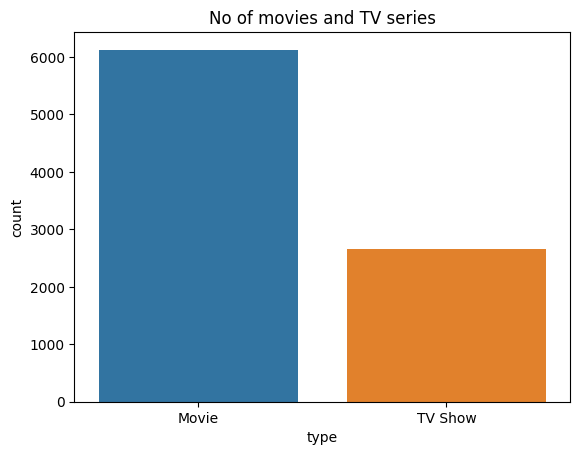

In [ ]:
# No of movies and tv series available
sns.countplot(x = "type" , data = df_date)
plt.title("No of movies and TV series")
plt.show()

More numbers of movies are available compare to TV shows

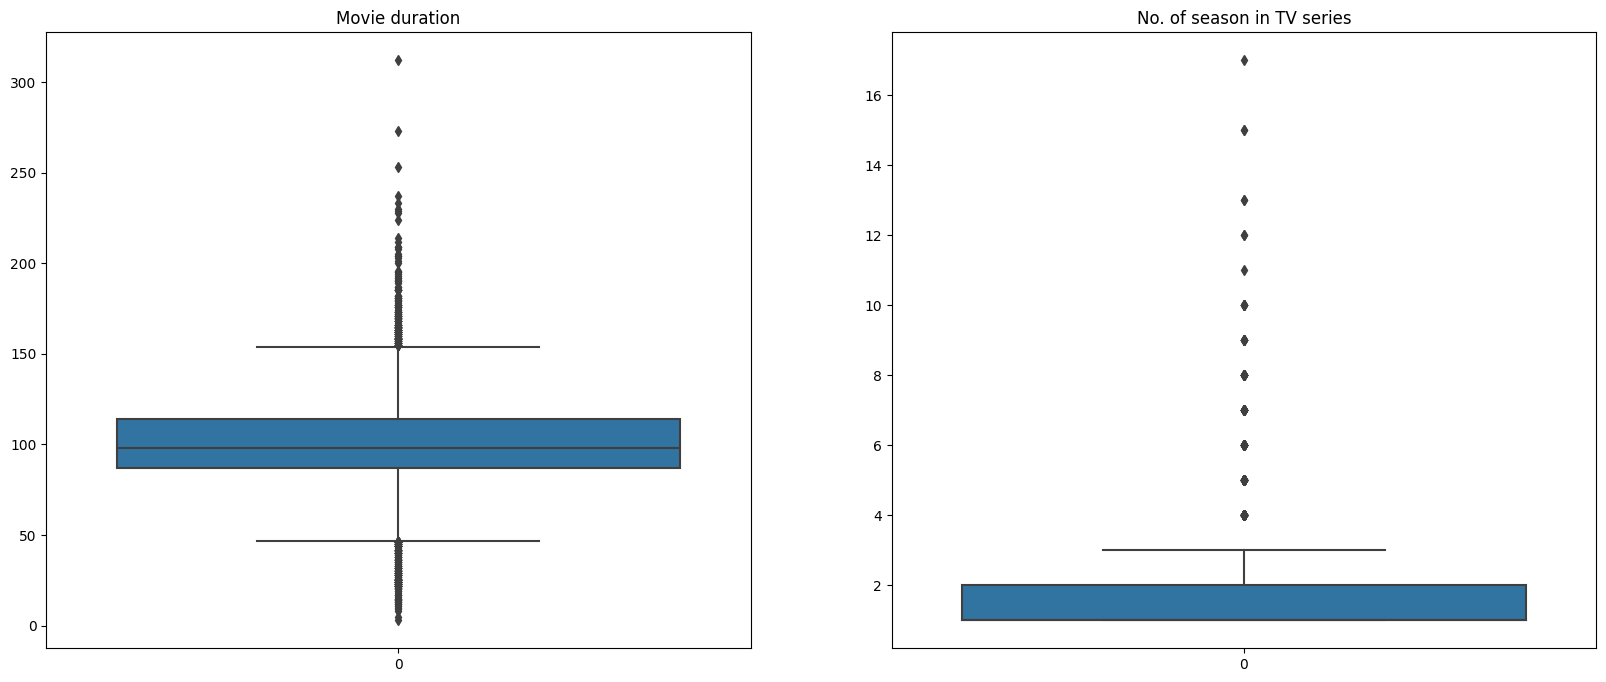

In [ ]:
# Spliting duration data
plt.figure(figsize=(20,8))
df_dur = df.loc[df["duration"].str.contains("min")== True]["duration"].apply(lambda x: x.split()[0]).astype(int)
plt.subplot(1,2,1)
sns.boxplot(data= df_dur)
plt.title("Movie duration")

df_season_dur = df.loc[df["duration"].str.contains("Season")== True]["duration"].apply(lambda x: x.split()[0]).astype(int)
plt.subplot(1,2,2)
sns.boxplot(df_season_dur.values)
plt.title("No. of season in TV series")
plt.show()

**Conclusion -**

* Average movie duration time is 100 min
* Most of TV series contain 1 or 2 seasons.
* More number of outliers present in movies as compare to TV series
* distribution of movie duration is gaussian while skewed for TV series.

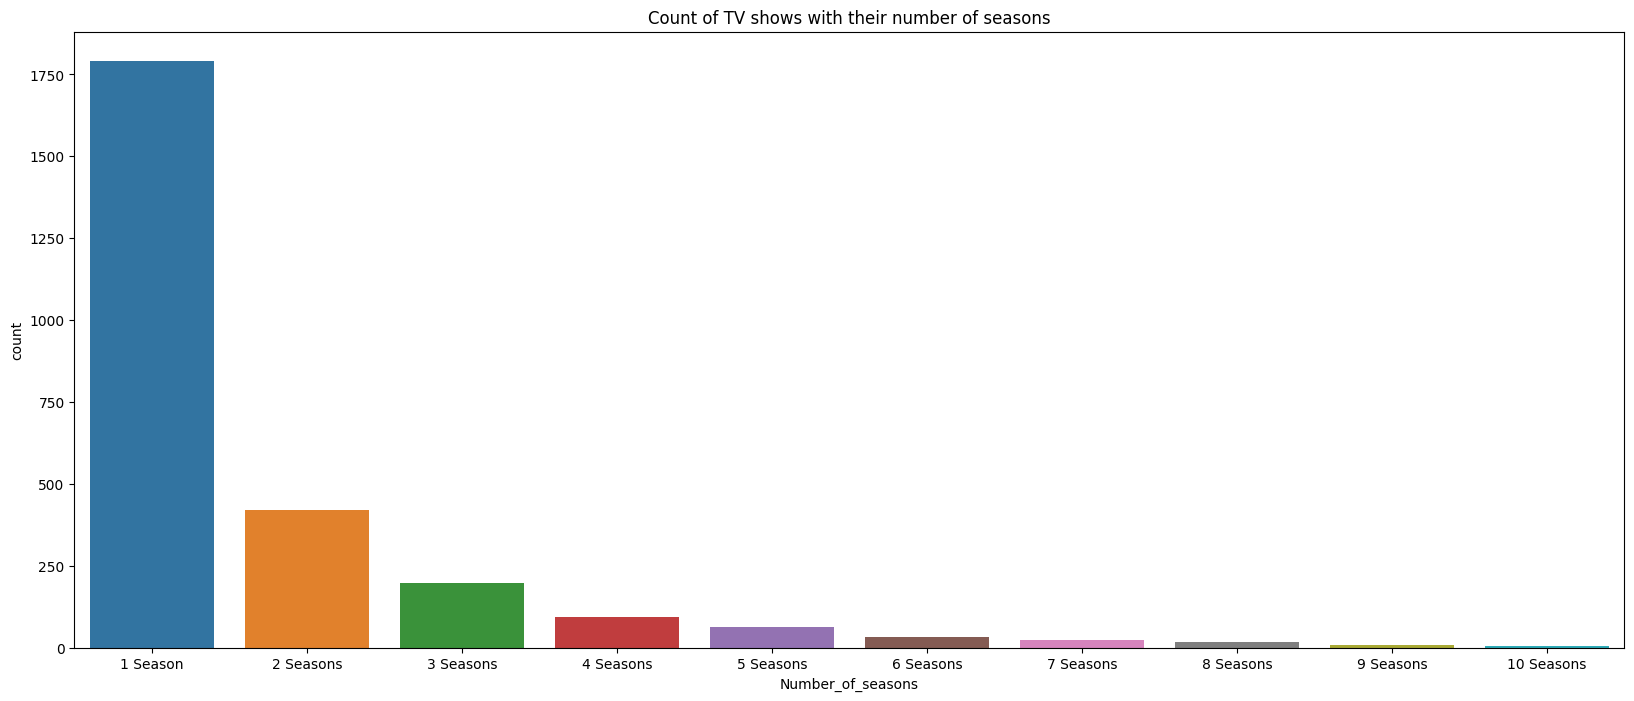

In [ ]:
# Filtering out top 10 values of TV shows using string.
df_series = df.loc[df["duration"].str.contains("Season")== True , "duration" ].value_counts().reset_index()[:10]
df_series.rename(columns = {"duration" : "Number_of_seasons"}, inplace = True)
plt.figure(figsize=(20,8))
sns.barplot(x = "Number_of_seasons" , y = "count" , data = df_series)
plt.title("Count of TV shows with their number of seasons")
plt.show()

Most of TV series contains one season.

# Bivariate Analysis

**Analysis of number of content added on Netflix over the period**

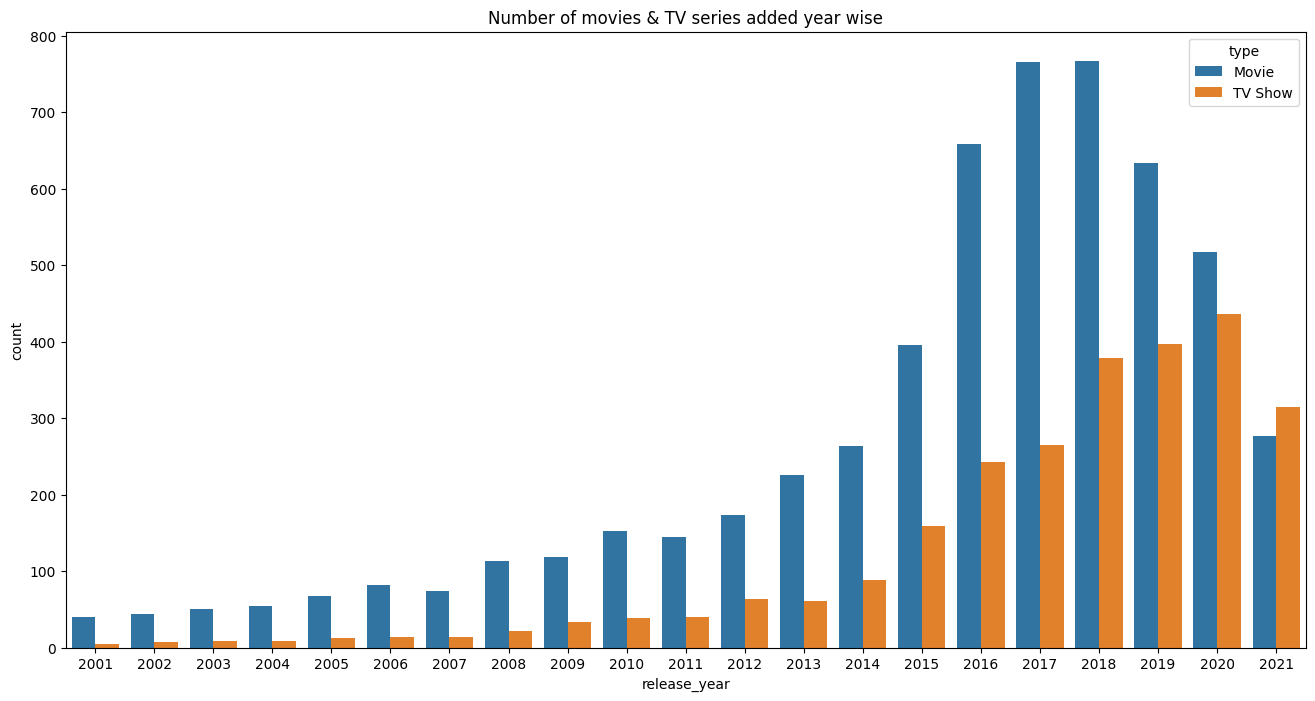

In [ ]:
# Trend after the year 2000
plt.figure(figsize=(16,8))
df_year = df.loc[df['release_year']>2000]
sns.countplot(x='release_year', data = df_year, hue='type')
plt.title("Number of movies & TV series added year wise")
plt.show()

**Conclusion :-**

* The highest number of TV shows were added in 2020
* There has been an increasing trend in the number of movies added to Netflix after the year 2015.
* We can see change in trend in 2021 because more number of TV series are added

In [ ]:
df_month = df_date.sort_values(by ="month")
df_month['month'] = df.date_added.dt.month_name()

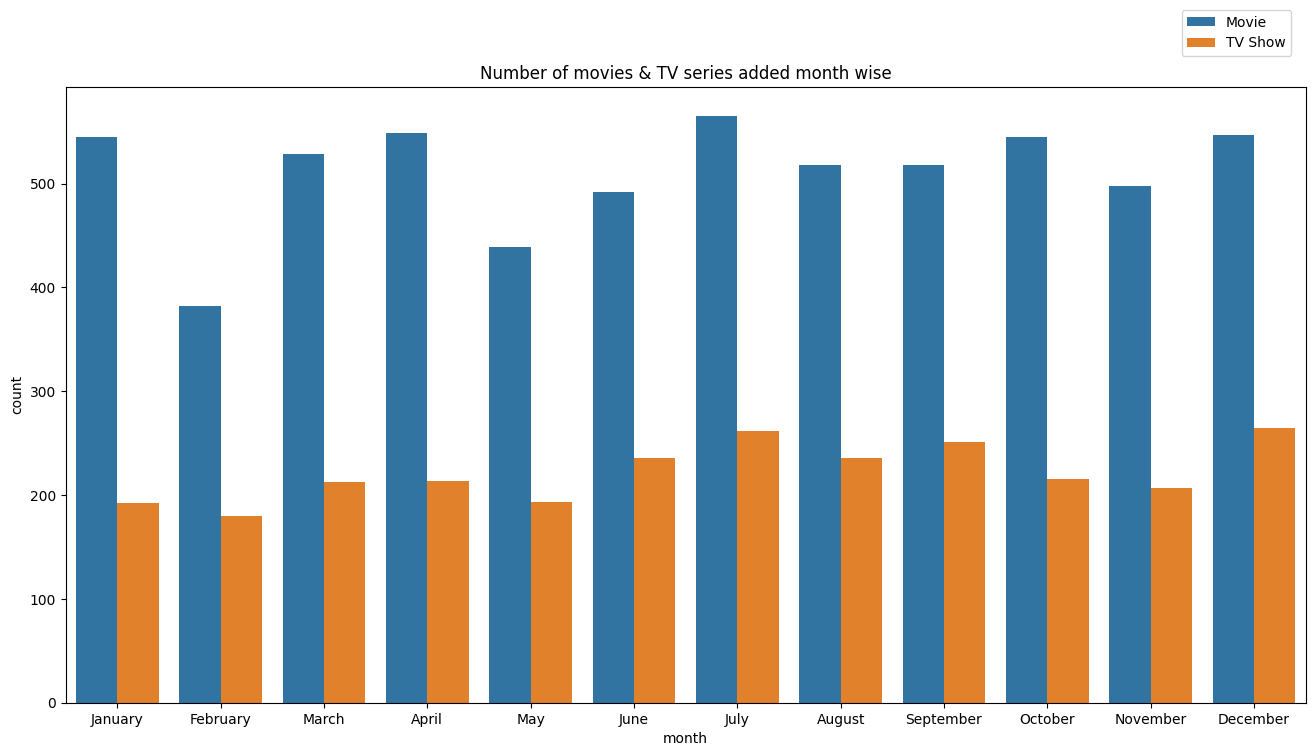

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x = "month" , data = df_month , hue = "type")
plt.title("Number of movies & TV series added month wise")
plt.legend(loc=(0.9,1.05))
plt.show()

**Conclusion :-**

* More number of movies were released compare to Tv series in every month.

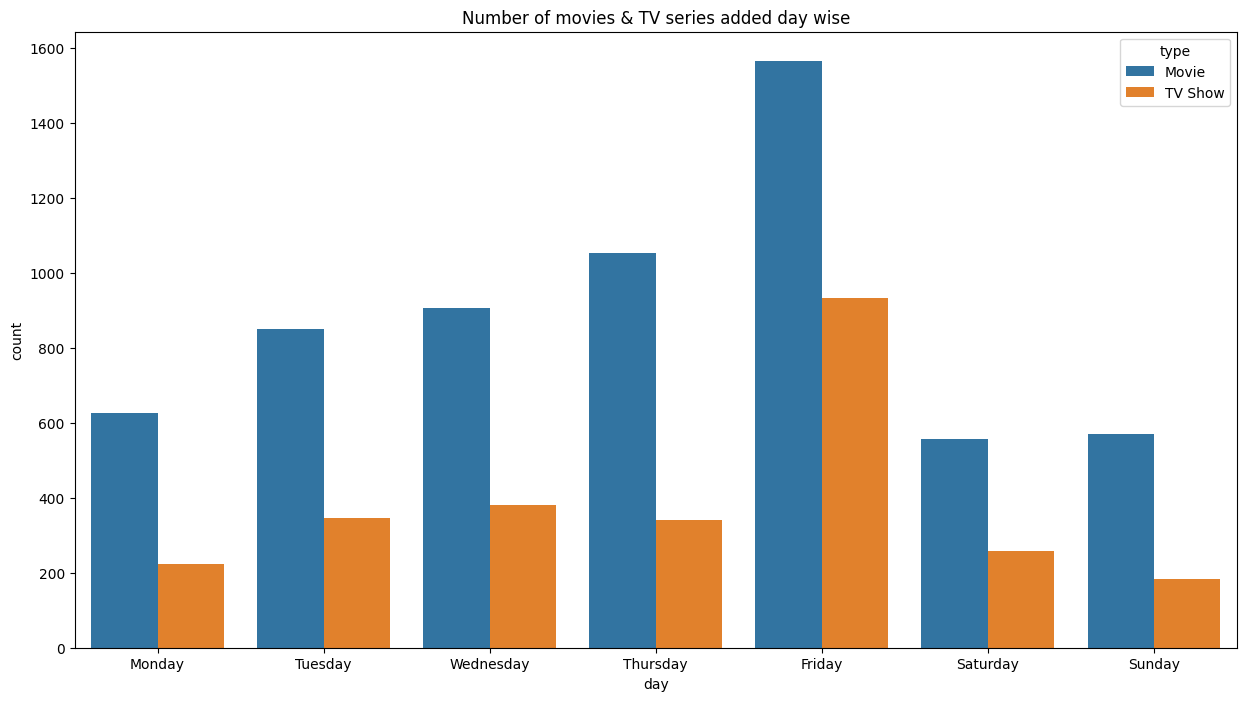

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = "day" , data = df_date , hue = "type" ,  order=["Monday" , "Tuesday" , "Wednesday", "Thursday", "Friday", "Saturday" ,"Sunday"])
plt.title("Number of movies & TV series added day wise")
plt.show()

**Conclusion :**
* Most of the content added on netflix on "Friday" followed by Thursday as weekend approches after these days.

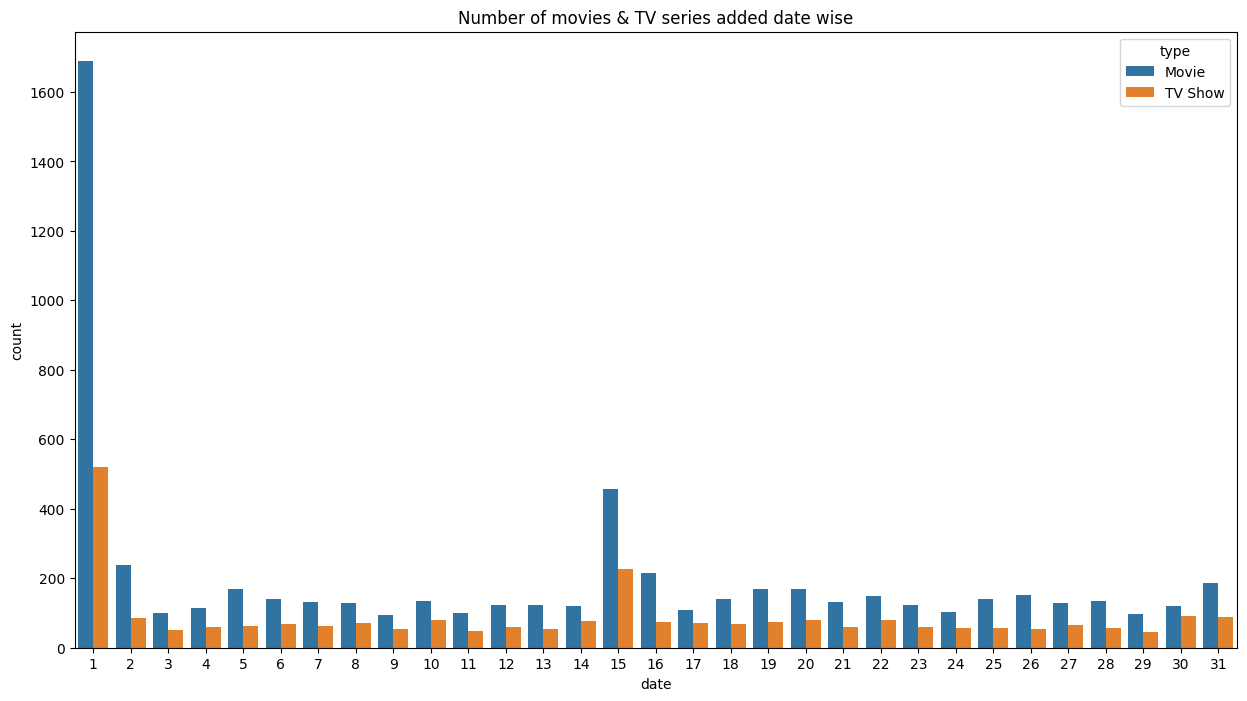

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = "date" , data = df_date , hue = "type")
plt.title("Number of movies & TV series added date wise")
plt.show()

**Conclusion :**
* Most of content were added on 1st.

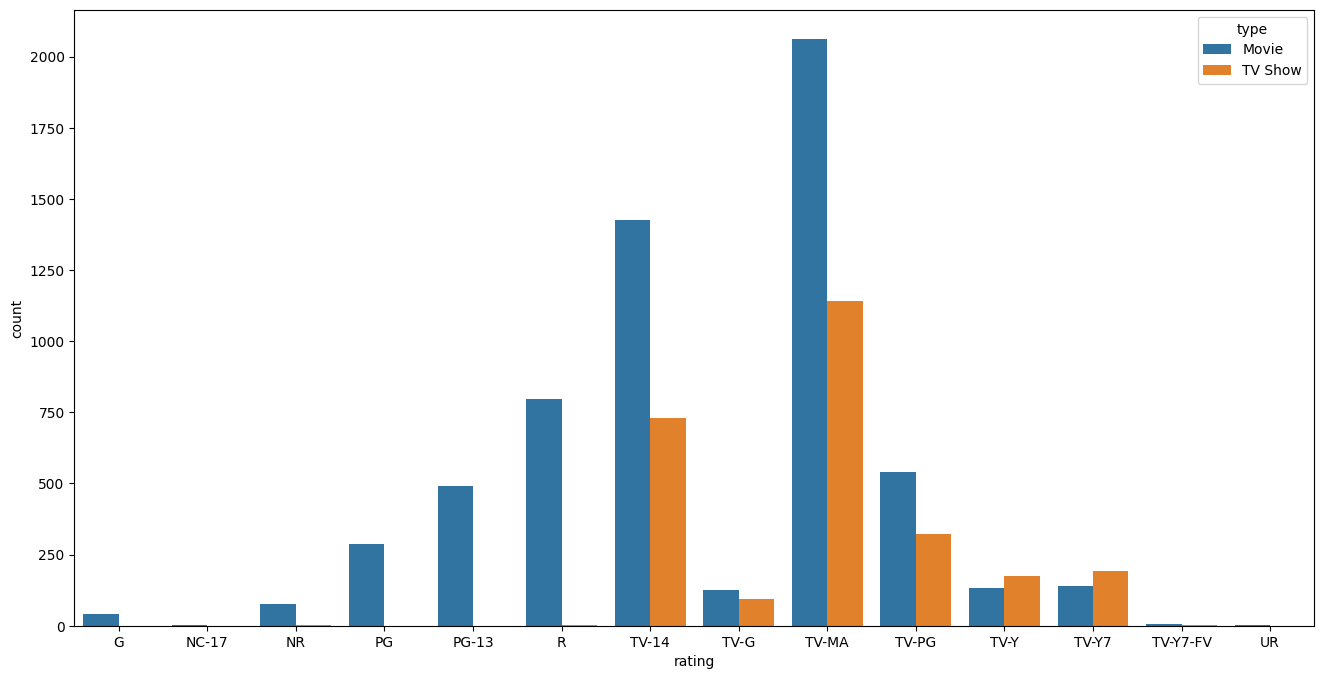

In [ ]:
rating = df[df["rating"].isnull()== False]
rating.reset_index(inplace = True)
plt.figure(figsize=(16,8))
sns.countplot(x ="rating" , data = rating , hue = "type")
plt.show()

**Conclusion :-**
* Most of TV series & movies are belongs to TV-MA & TV-14 rating which are for adult and teenager

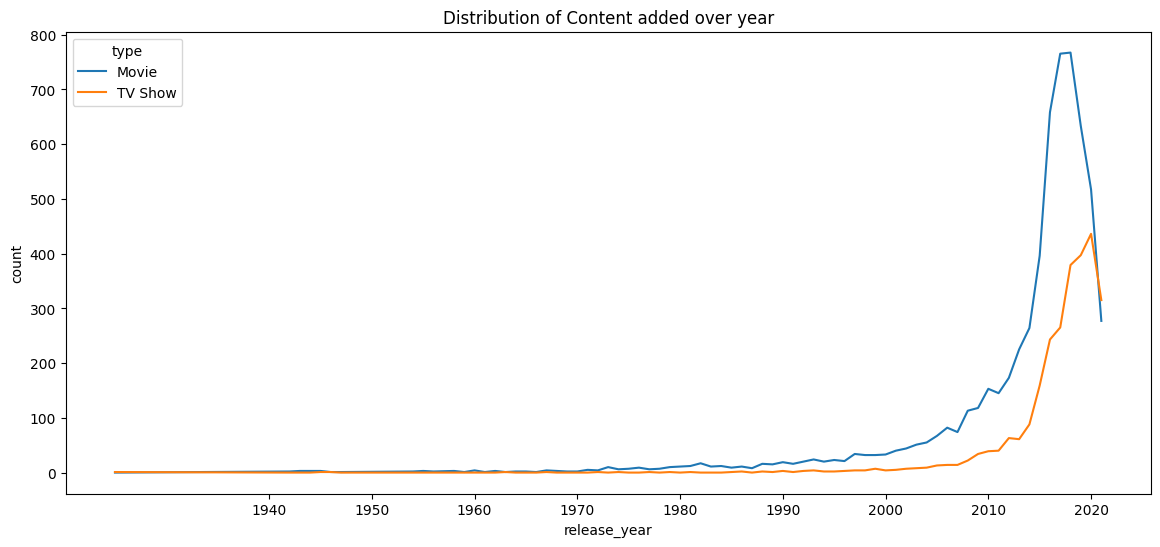

In [ ]:
year_trend = pd.DataFrame(df.groupby("release_year", as_index=False)["type"].value_counts())
plt.figure(figsize=(14,6))
sns.lineplot(x = "release_year" , y = "count" , data = year_trend , hue = "type")
plt.xticks(np.arange(1940,2025,10))
plt.title("Distribution of Content added over year")
plt.show()

**Conclusion :-**
* The highest number of TV shows were added in 2020
* There has been an increasing trend in the number of movies added to Netflix after the year 2015.
* We can see change in trend in 2021 because more number of TV series are added

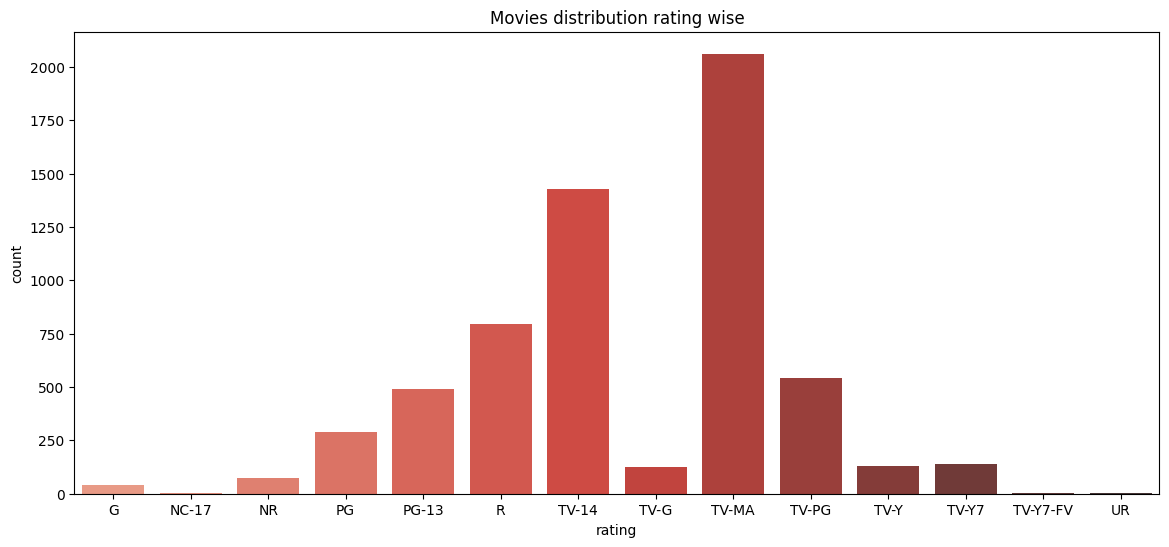

In [ ]:
plt.figure(figsize=(14,6))
movies_rating = df.loc[df["type"] == "Movie" , ["type" , "rating"]]
sns.countplot( x="rating" , data =movies_rating,  palette="Reds_d" )
plt.title("Movies distribution rating wise")
plt.show()

**Conclusion** :
* Most of movies are belongs to TV-MA & TV-14 rating.

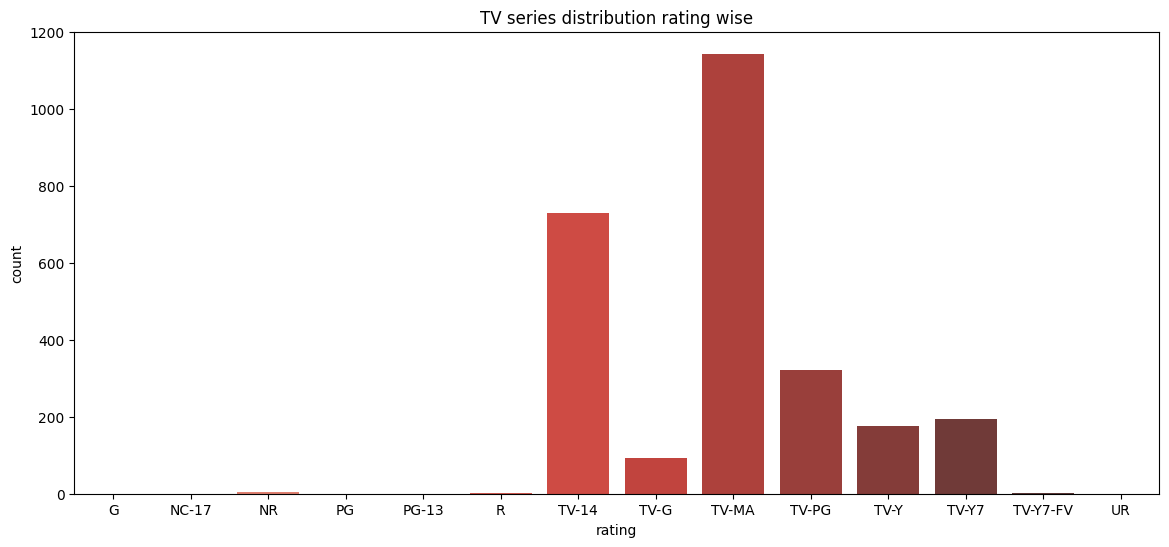

In [ ]:
plt.figure(figsize=(14,6))
TV_rating = df.loc[df["type"] == "TV Show" , ["type" , "rating"]]
sns.countplot( x="rating" , data =TV_rating,  palette="Reds_d" )
plt.title("TV series distribution rating wise")
plt.show()

**Conclusion** :
* Most of TV Shows are belongs to TV-MA & TV-14 rating.

## Pre-processing involves unnesting of the data in columns like Actor, Director, Country

In [ ]:
# Exploding cast column
cast = df["cast"].apply(lambda x : str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast,  index = df["title"])
df_cast = df_cast.stack()
df_cast = df_cast.reset_index()
df_cast.drop(columns = "level_1" , inplace = True)
df_cast.columns = ["title" , "cast"]
df_mer_cast = df.merge(df_cast , on = "title" )
df_mer_cast

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64886,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Manish Chaudhary
64887,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Meghna Malik
64888,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Malkeet Rauni
64889,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish


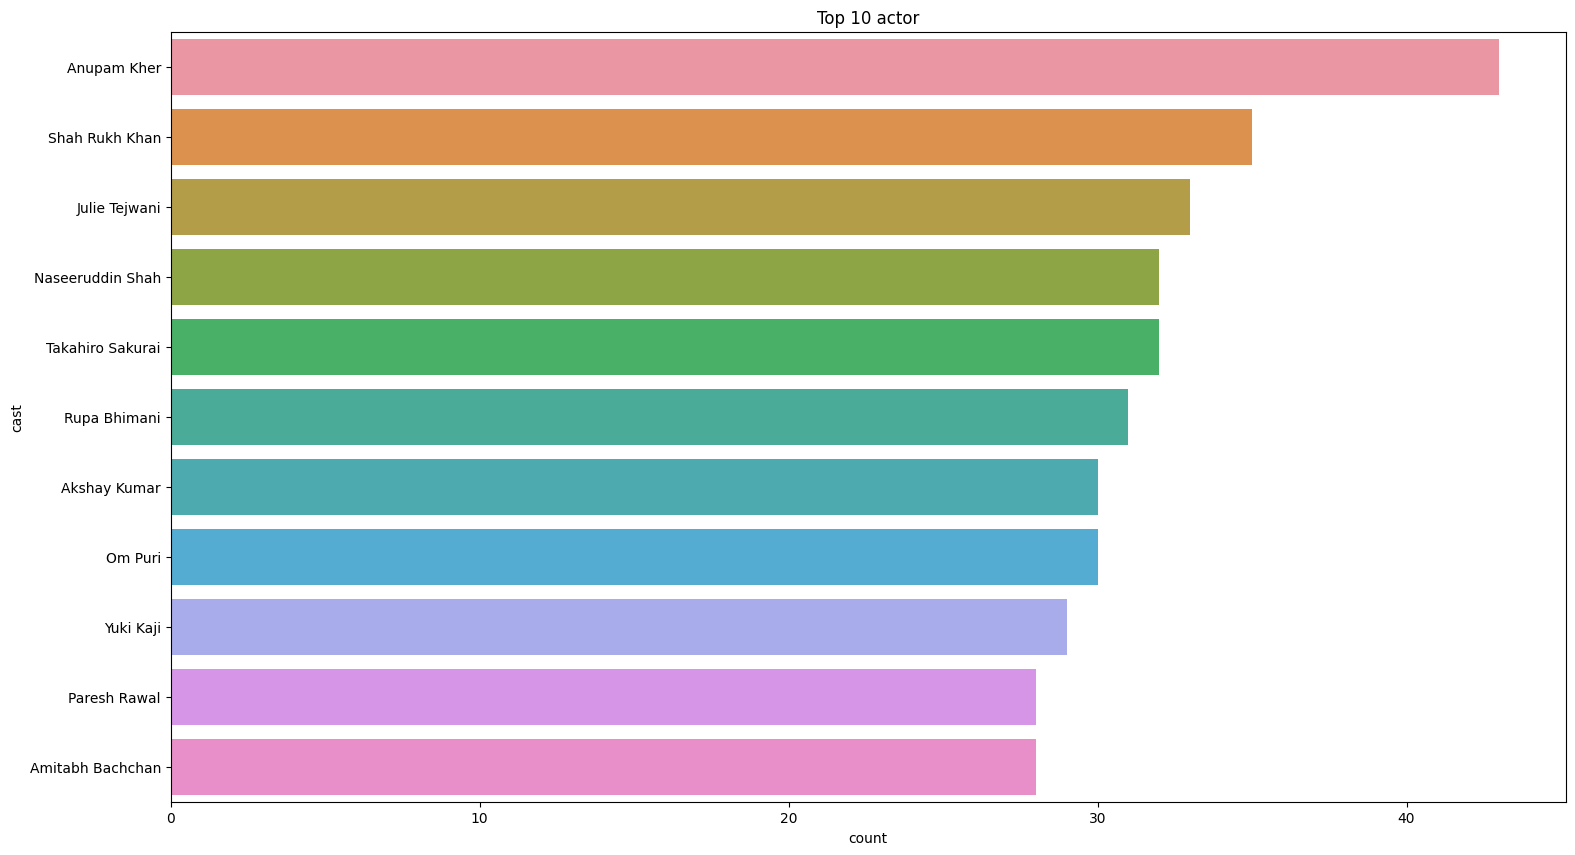

In [ ]:
plt.figure(figsize = (18,10))
df_cast['cast']=df_cast[df_cast['cast']!="Unknown"]['cast'].str.replace('\$\$','')
sns.countplot(y = "cast" , data =df_cast,order=df_cast.cast.value_counts().iloc[:11].index)
plt.title("Top 10 actor")
plt.show()

**Conclusion :**

* These are the top 10 most famous actors.

In [ ]:
# Exploding director column
director = df["director"].apply(lambda x : str(x).split(", ")).tolist()
df_director = pd.DataFrame(director, index = df["title"])
df_director= df_director.stack()
df_director = df_director.reset_index()
df_director.drop(columns ="level_1" , inplace = True)
df_director.columns = ["title" , "director"]
df_mer_director = df.merge(df_director , on = "title" )
df_mer_director

,show_id,type,title,director_x,cast,country,date_added,release_year,rating,duration,listed_in,description,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Unknown
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9596,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",David Fincher
9597,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Unknown
9598,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Ruben Fleischer
9599,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Peter Hewitt


In [ ]:
# Exploding country column
country = df["country"].apply(lambda x: str(x).split(", ")).tolist()
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]
df_country["country"] = df_country.country.str.replace(',','')
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown
3,Jailbirds New Orleans,Unknown
4,Kota Factory,India
...,...,...
10823,Zodiac,United States
10824,Zombie Dumb,Unknown
10825,Zombieland,United States
10826,Zoom,United States


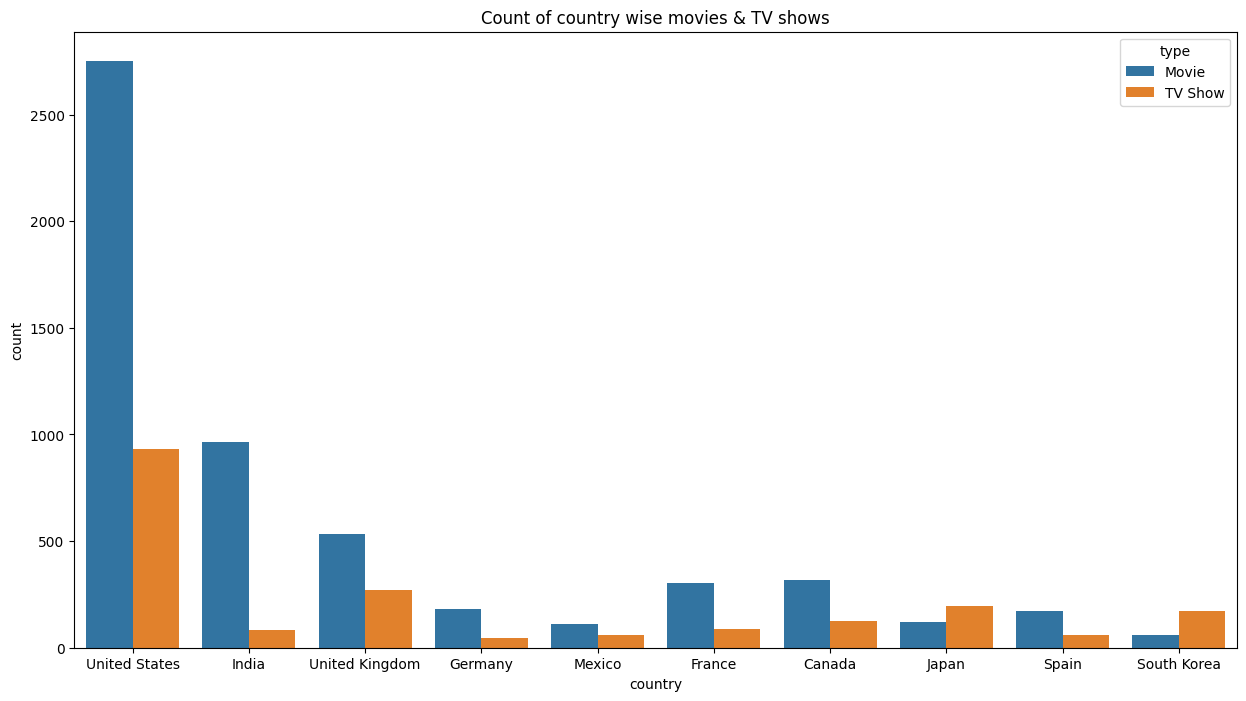

In [ ]:
Country_trend = df.merge(df_country , on = "title")
Country_trend.drop(columns = "country_x" , inplace = True)
Country_trend.rename(columns = {"country_y" : "country"}, inplace = True)
Country_trend = Country_trend.loc[Country_trend["country"] != "Unknown"]
country_top10_list = Country_trend["country"].value_counts().head(10).reset_index()
Country_trend = Country_trend.merge(country_top10_list, how = "inner" , on = "country")
plt.figure(figsize = (15,8))
sns.countplot(x ="country" , data =Country_trend , hue = "type" )
plt.title("Count of country wise movies & TV shows")
plt.show()

**Conclusion :-**
* Add more movies in Unites states and India as compare to TV Series.
* To add more TV shows in Japan and South Korea.

In [ ]:
listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(listed_in, index = pd.MultiIndex.from_frame(df[["country", "title", "rating"]]))
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns = "level_3" , inplace = True)
df_genre.columns = ["country", "title", "rating" , "genre"]
df_genre.head()

,country,title,rating,genre
0,United States,Dick Johnson Is Dead,PG-13,Documentaries
1,South Africa,Blood & Water,TV-MA,International TV Shows
2,South Africa,Blood & Water,TV-MA,TV Dramas
3,South Africa,Blood & Water,TV-MA,TV Mysteries
4,Unknown,Ganglands,TV-MA,Crime TV Shows


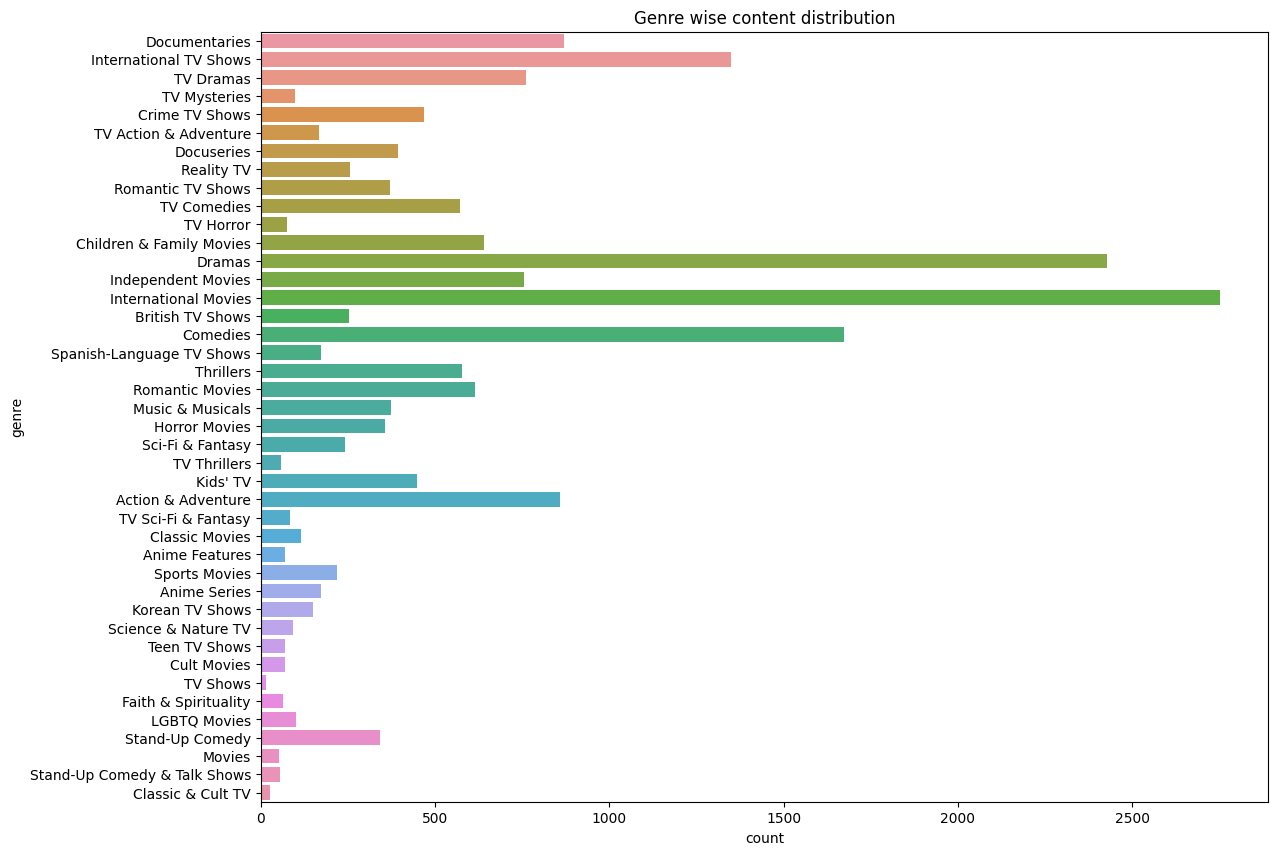

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(y = "genre" , data =df_genre )
plt.title("Genre wise content distribution")
plt.show()

**Conclusion :**
most of content added on Netflix are of following genre
* International Movies
* Dramas
* Comedies
* International TV show

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

['Teens', 'Adults', 'Older Kids', 'Kids']
Categories (4, object): ['Kids', 'Adults', 'Older Kids', 'Teens']

In [ ]:
data= df_country.groupby("country", as_index=False)['country'].value_counts().reset_index()
data = data['country']

heatmap_data = df.loc[df['country'].isin(data)]

In [ ]:
df_heatmap = pd.crosstab(heatmap_data['country'],heatmap_data['target_ages'],normalize = "index").T

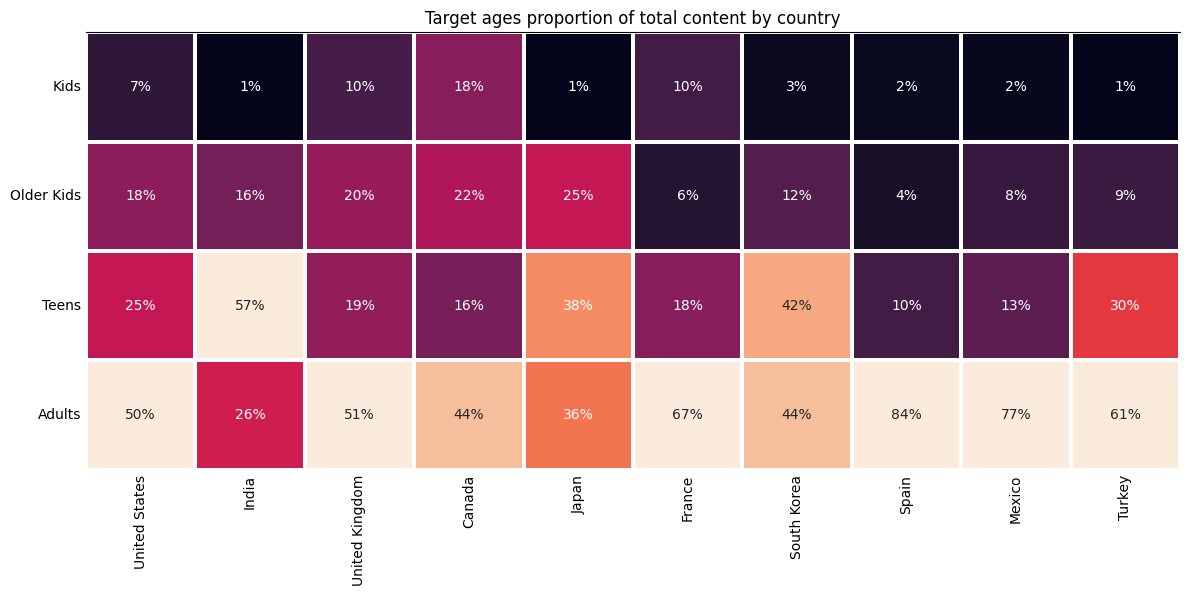

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico', 'Turkey']

age_list = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_list,country_list],square=True, linewidth=1.5,cbar=False,
            annot=True,fmt='1.0%',vmax=0.5,vmin=0.01,ax=ax,annot_kws={"fontsize":10})

ax.spines['top'].set_visible(True)

ax.set_yticklabels(ax.get_yticklabels(),  rotation = 0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Target ages proportion of total content by country')
plt.tight_layout()
plt.show()

**conclusion :-**
* Most shows in India are targeted to teens and in united state are targeted to adults.

# Non-Graphical Analysis

In [ ]:
country_director= df_mer_director.merge(df_country , on = "title")
country_director= country_director.drop(columns = ["director_x" , "country_x" ])
country_director.rename(columns = {"director_y": "director" , "country_y" : "country"}, inplace = True)
country_director = country_director.loc[country_director["director"] != "Unknown"]
country_director.reset_index(inplace= True)
country_director

,index,show_id,type,title,cast,date_added,release_year,rating,duration,listed_in,description,director,country
0,0,s1,Movie,Dick Johnson Is Dead,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,United States
1,2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq,Unknown
2,5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Mike Flanagan,Unknown
3,6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Robert Cullen,Unknown
4,7,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,José Luis Ucha,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8957,11919,s8802,Movie,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Majid Al Ansari,Jordan
8958,11920,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",David Fincher,United States
8959,11922,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Ruben Fleischer,United States
8960,11923,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Peter Hewitt,United States


In [ ]:
country = country_director['country'].value_counts()[:9].index.tolist()
print(' Top 9 Directors of Top 9 Countries \n')
for val in country:
    if val != 'Unknown':
        print(f"{val} \n {country_director.loc[country_director['country']==val, 'director'].value_counts()[:2]} \n")

 Top 9 Directors of Top 9 Countries 

United States 
 director
Marcus Raboy    15
Jay Karas       15
Name: count, dtype: int64 

India 
 director
Anurag Kashyap    9
David Dhawan      9
Name: count, dtype: int64 

United Kingdom 
 director
Alastair Fothergill    4
Edward Cotterill       4
Name: count, dtype: int64 

Canada 
 director
Justin G. Dyck      8
Mike Clattenburg    5
Name: count, dtype: int64 

France 
 director
Thierry Donard     5
Youssef Chahine    4
Name: count, dtype: int64 

Spain 
 director
Fernando González Molina    4
Hernán Zin                  4
Name: count, dtype: int64 

Germany 
 director
Detlev Buck                 5
Fernando González Molina    3
Name: count, dtype: int64 

Japan 
 director
Toshiya Shinohara    7
Masahiko Murata      5
Name: count, dtype: int64 



**Conclusion :**

* Anurag Kashyap and David Dhawan are stand out as the most prominent directors in India similarly Jay Karas and Marcus Raboyare are the most famous directors in United States.

In [ ]:
country_director["director"].value_counts()

director
Paul Greengrass           28
Rajiv Chilaka             22
Jan Suter                 21
Raúl Campos               19
Steven Spielberg          18
                          ..
YC Tom Lee                 1
Manu Ashokan               1
Anita Udeep                1
Alberto Arnaut Estrada     1
Mozez Singh                1
Name: count, Length: 4991, dtype: int64

**Conclusion** :
* "Paul Greengrass" is the most famous director

In [ ]:
country_cast= df_mer_cast.merge(df_country , on = "title")
country_cast= country_cast.drop(columns = ["cast_x" , "country_x"])
country_cast = country_cast.rename(columns = {"cast_y" : "cast" , "country_y" : "country"})
country_cast = country_cast.loc[country_cast["cast"] != "Unknown"].reset_index()
country_cast

,index,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,cast,country
0,1,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
1,2,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa
2,3,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,South Africa
3,4,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,South Africa
4,5,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Dillon Windvogel,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80823,81827,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Manish Chaudhary,India
80824,81828,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Meghna Malik,India
80825,81829,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Malkeet Rauni,India
80826,81830,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India


In [ ]:
# Country wise top six casts
country_actor = country_cast['country'].value_counts()[:6].index.tolist()
print(' Top 6 Actors of Top 6 Countries \n')
for val in country:
    if val != 'Unknown':
        print(f"**{val}** \n {country_cast.loc[country_cast['country']==val, 'cast'].value_counts()[:2]} \n")

 Top 6 Actors of Top 6 Countries 

**United States** 
 cast
Tara Strong          22
Samuel L. Jackson    22
Name: count, dtype: int64 

**India** 
 cast
Anupam Kher       40
Shah Rukh Khan    34
Name: count, dtype: int64 

**United Kingdom** 
 cast
David Attenborough    17
John Cleese           16
Name: count, dtype: int64 

**Canada** 
 cast
John Paul Tremblay    14
Robb Wells            14
Name: count, dtype: int64 

**France** 
 cast
Wille Lindberg    5
Benoît Magimel    5
Name: count, dtype: int64 

**Spain** 
 cast
Mario Casas    10
Luis Tosar      9
Name: count, dtype: int64 

**Germany** 
 cast
Daniel Brühl     5
Charly Hübner    4
Name: count, dtype: int64 

**Japan** 
 cast
Takahiro Sakurai    29
Yuki Kaji           28
Name: count, dtype: int64 



**Conclusion :**
* Netflix has added more content of cast Anupam Kher or Shah Rukh Khan in India.

In [ ]:
country_cast["cast"].value_counts().head()

cast
Anupam Kher           46
David Attenborough    45
Vincent Tong          42
John Cleese           40
Tara Strong           39
Name: count, dtype: int64

These are the top five famous actors.

# Heatmap

In [ ]:
country_wise_trend = df.merge(df_country , on = "title")
country_wise_trend.drop(columns = "country_x" , inplace = True)
country_wise_trend.rename(columns = {"country_y":"country"}, inplace = True)

In [ ]:
temp = country_wise_trend['country'].value_counts()[:11].reset_index()
country_list = temp['country'].tolist()
top10_country = country_wise_trend.loc[country_wise_trend['country'].isin(country_list)]
top10_country = top10_country.loc[top10_country["country"]!="Unknown"]

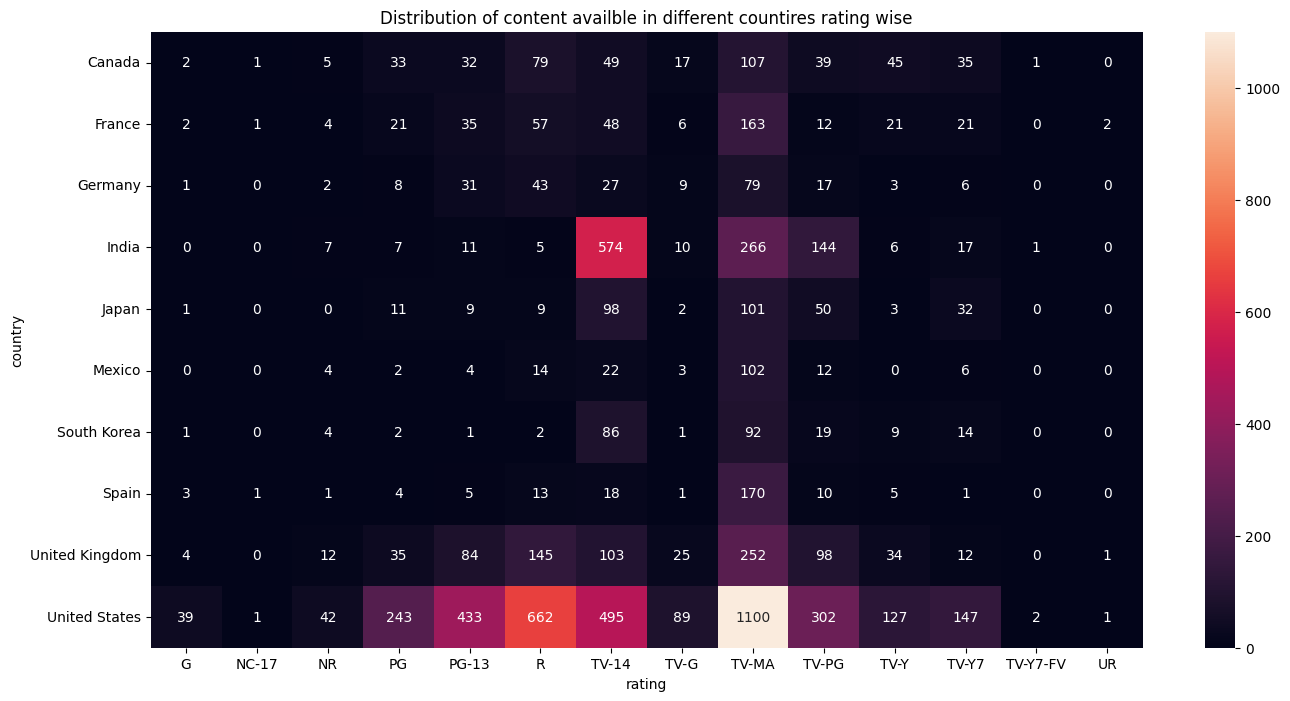

In [ ]:
heat_rating = top10_country.groupby("country")["rating"].value_counts().reset_index()
heat_rating = heat_rating.pivot(index='country', columns='rating', values='count')
plt.figure(figsize = (16,8))
sns.heatmap(heat_rating, annot = True, fmt="d")
plt.title("Distribution of content availble in different countires rating wise")
plt.show()

**Conclusion :**

* TV-MA (Adults Category) content is predominantly found in the top 10 countries with the highest volume.
* TV-14 category, India and the United States have a larger quantity of content compared to other countries.

In [ ]:
df_genre.drop(columns=['country'], inplace=True)
genre_country_drop= country_wise_trend.merge(df_genre , on= "title")
genre_country_drop.head(5)

,show_id,type,title,director,cast,date_added,release_year,rating_x,duration,listed_in,description,target_ages,country,rating_y,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,United States,PG-13,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,South Africa,TV-MA,International TV Shows
2,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,South Africa,TV-MA,TV Dramas
3,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,South Africa,TV-MA,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,Unknown,TV-MA,Crime TV Shows


In [ ]:
genrelist = genre_country_drop['genre'].value_counts()[:10].reset_index()
genres = genrelist['genre'].tolist()
top10_genre = genre_country_drop.loc[genre_country_drop['genre'].isin(genres)]
top10_genre.loc[:10]

,show_id,type,title,director,cast,date_added,release_year,rating_x,duration,listed_in,description,target_ages,country,rating_y,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,United States,PG-13,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,South Africa,TV-MA,International TV Shows
2,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,South Africa,TV-MA,TV Dramas
5,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,Unknown,TV-MA,International TV Shows
9,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,India,TV-MA,International TV Shows


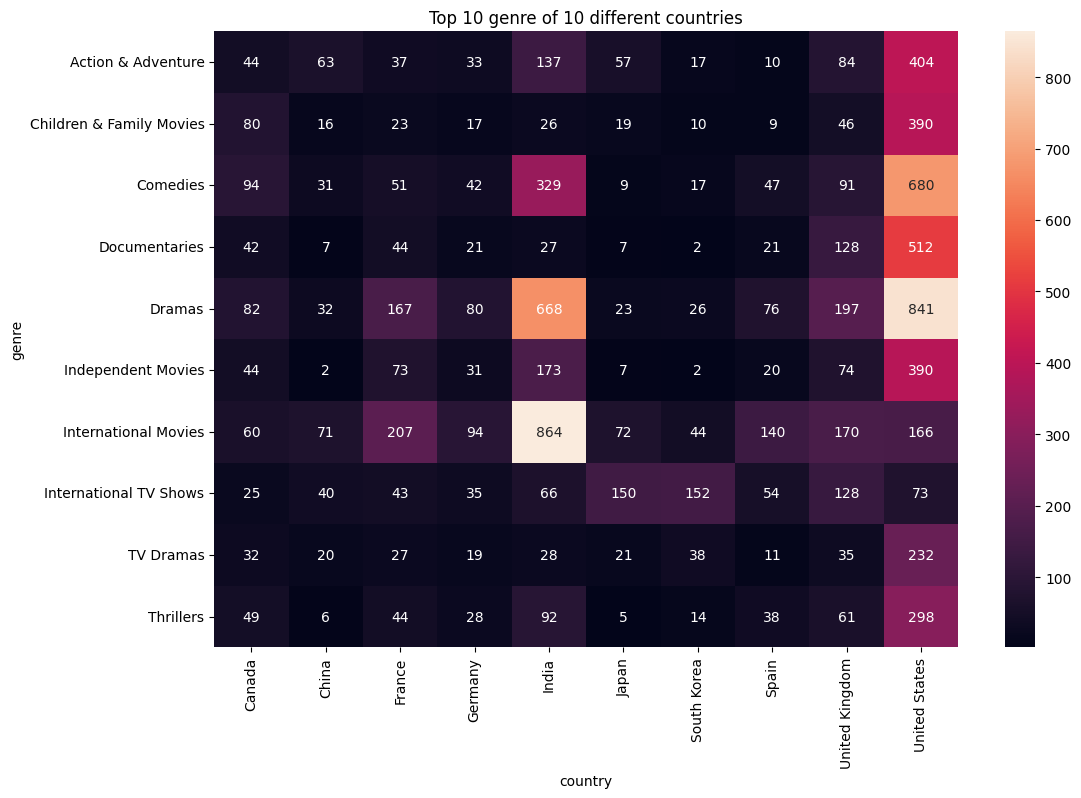

In [ ]:
top10_genre = top10_genre.loc[top10_genre["country"] != "Unknown"]
top10_genre["country"].value_counts()[:10]

temp_c = top10_genre["country"].value_counts()[:10].reset_index()
country_list = temp_c["country"].tolist()
countrywise_top10_genre = top10_genre.loc[top10_genre['country'].isin(country_list)]
countrywise_top10_genre.head()

heatmap_genre= countrywise_top10_genre.groupby("genre")["country"].value_counts().reset_index()
heatmap_genre.reset_index(inplace = True)
heat_genre_final = heatmap_genre.pivot(index='genre', columns='country', values='count')
plt.figure(figsize = (12,8))
sns.heatmap(heat_genre_final , annot = True, fmt = "d")
plt.title("Top 10 genre of 10 different countries")
plt.show()

**Conclusion :**

* Netflix should consider adding more content in genres such as International movies, Comedies, and Dramas in India.
* Netflix should prioritize adding more content in genres like Dramas and Comedies in United States.
* similar way we can infer for other country as well like Dramas and International movies in France etc.

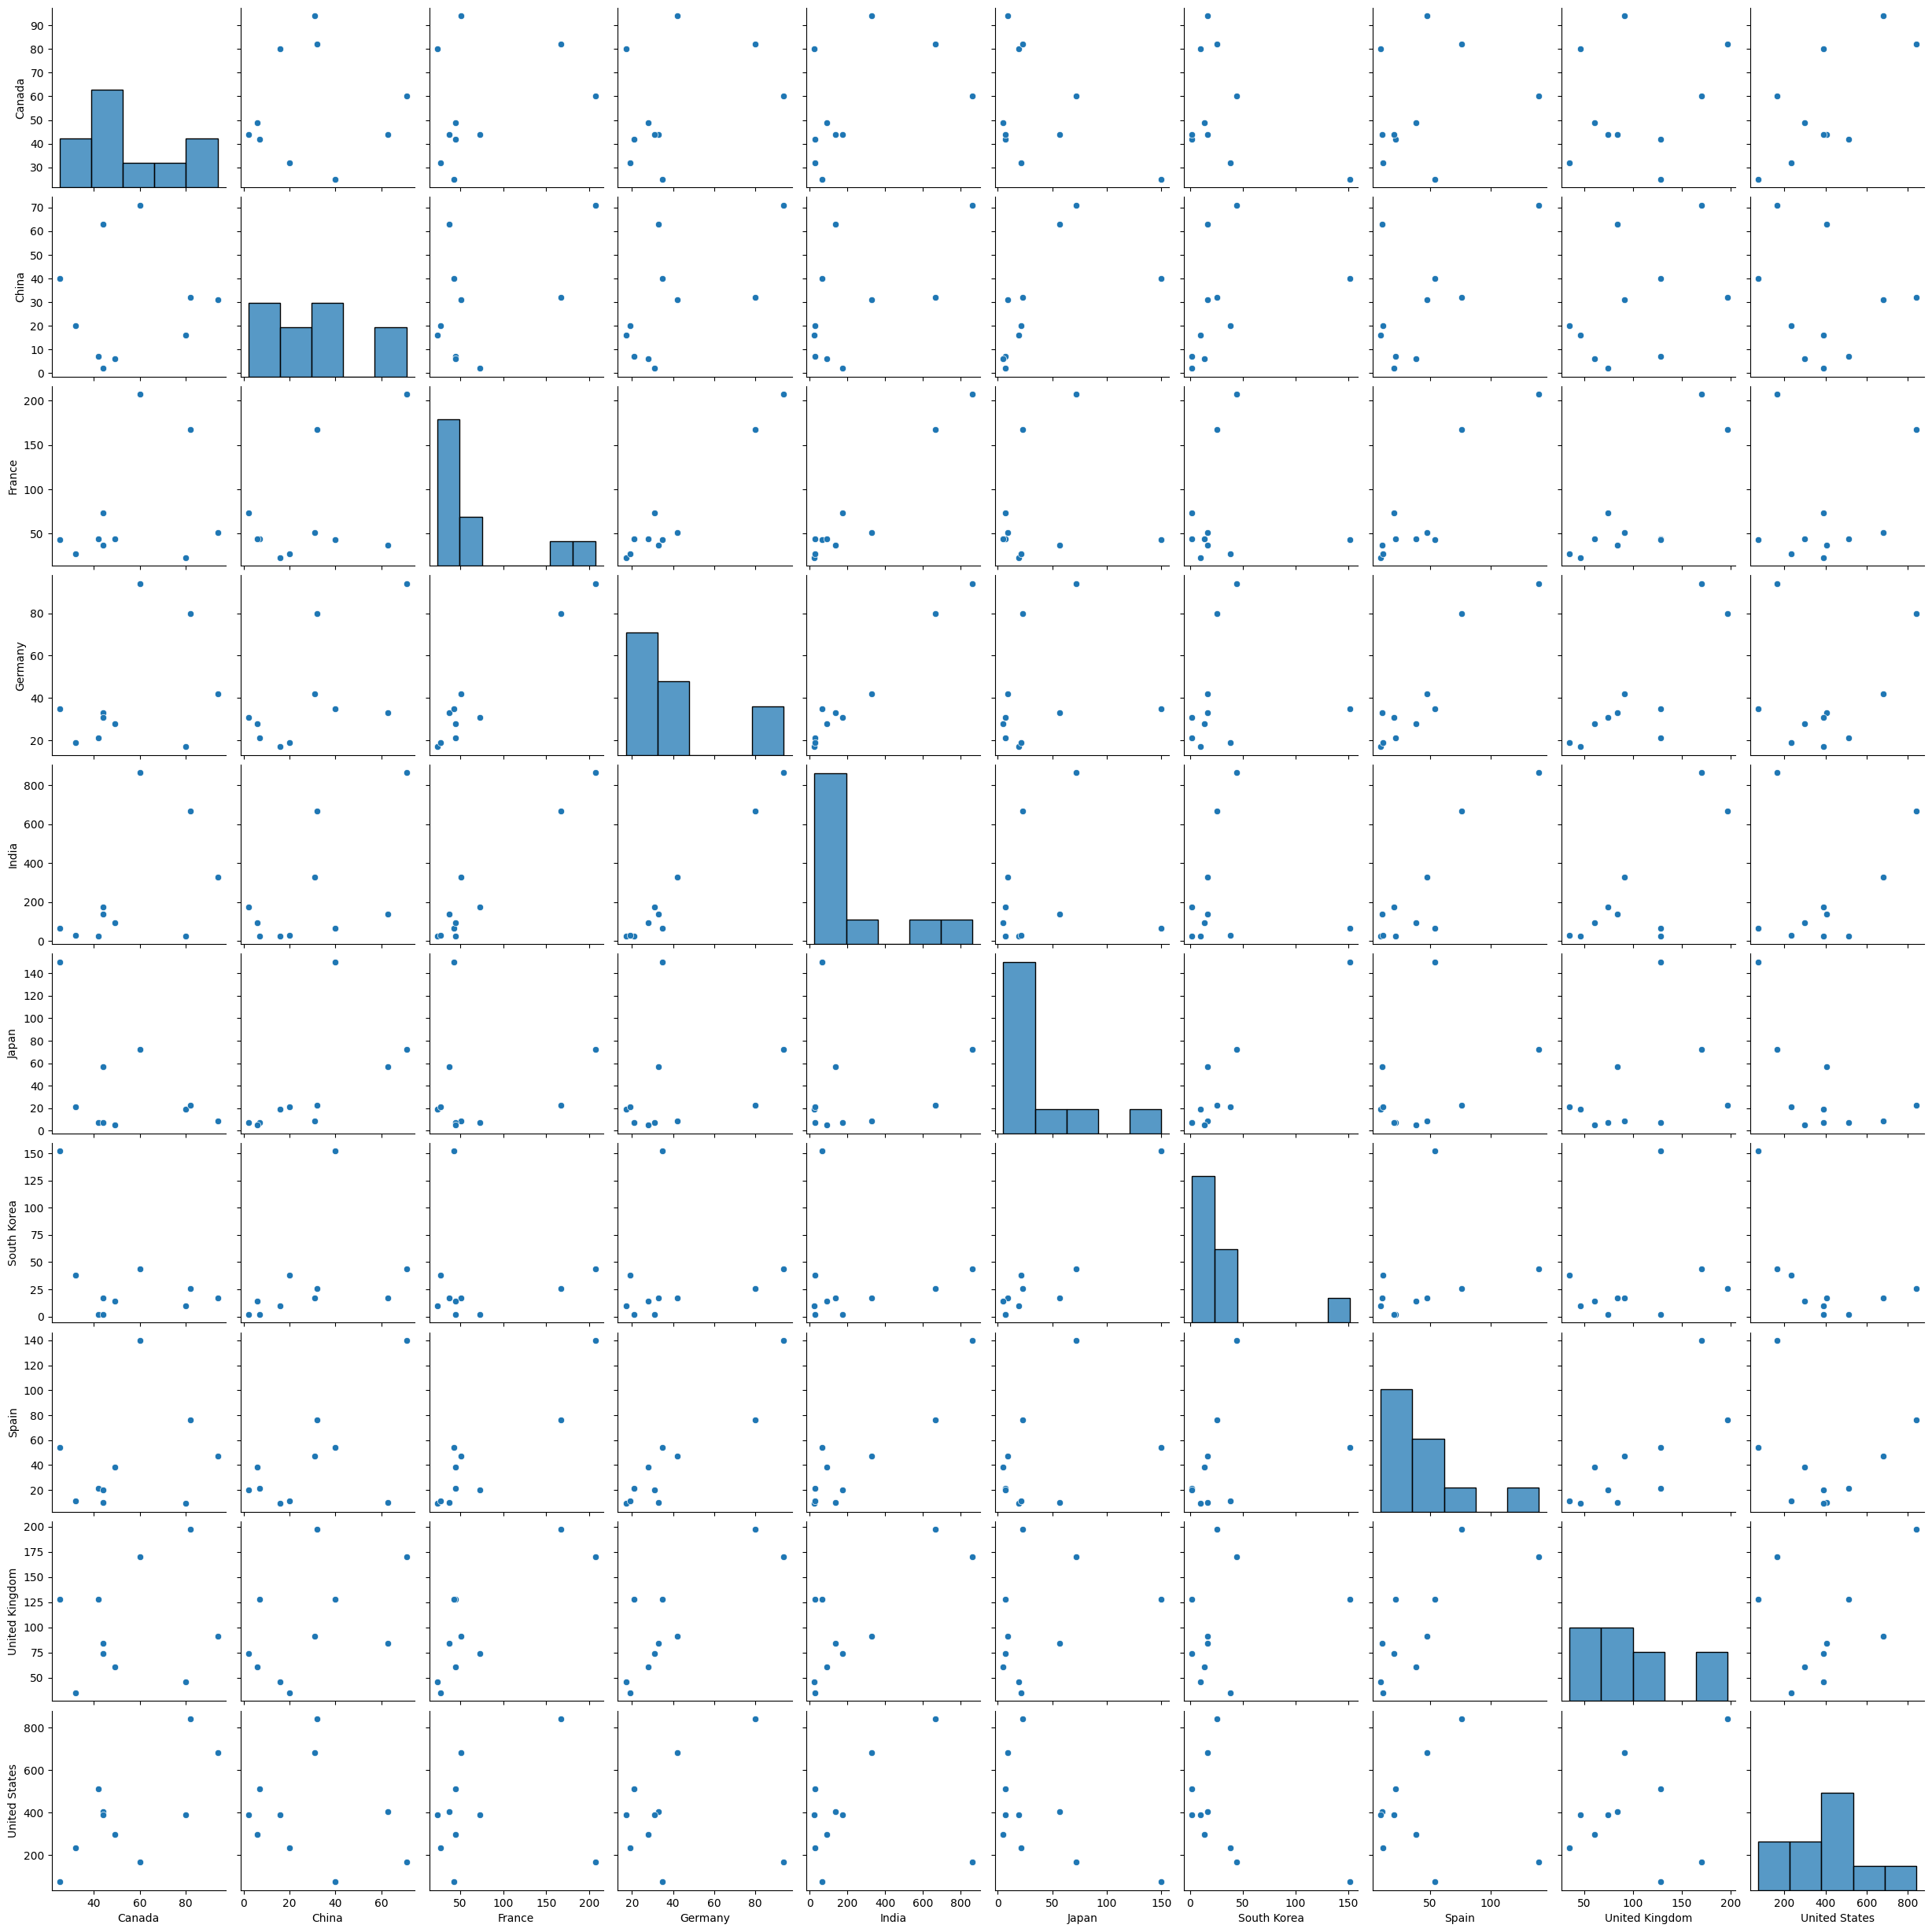

In [ ]:
sns.pairplot(heat_genre_final)

**Conclusion :**

* We can conclude from pairplot that India, and Germany is correlated hence we can recommend same genres and TV shows to users in Germany and vice versa. Similar way Japan and China. This can be useful to recommend country where we have less number of data.

# Summary :-
* More numbers of movies are available compare to TV shows
* Content for United States on Netflix is maximum as compare to other countries.
* most of content added on Netflix are of following genre
    * International Movies
    * Dramas
    * Comedies
    * International TV show
* Most of viewers of Netflix is from United States followed by India & United Kingdom
* Most shows in India are targeted to teens and in united state are targeted to adults.
* TV-14 category, India and the United States have a larger quantity of content compared to other countries.
* In United States , India and United kingdom movies are more popular as compare to other countires
* More number of movies were released compare to Tv series in every month.
* Average movie duration time is 100 min
* "Paul Greengrass" is the most famous director
* Anurag Kashyap and David Dhawan are stand out as the most prominent directors in India similarly Jay Karas and Marcus Raboyare are the most famous directors in United States.
* Netflix has added more content of cast Anupam Kher or Shah Rukh Khan in India.
* Most of TV series contain 1 or 2 seasons.
* To add more TV shows in Japan and South Korea.
* Netflix should consider adding more content in genres such as International movies, Comedies, and Dramas in India.
* Netflix should prioritize adding more content in genres like Dramas and Comedies in United States.
* There has been an increasing trend in the number of movies added to Netflix after the year 2015.
* India, and Germany is correlated hence we can recommend same genres and TV shows to users in Germany and vice versa. Similar way Japan and China. This can be useful to recommend country where we have less number of data.

# **Recommendations :-**
Movies :-

* Average movie duration time is 100 min
* Netflix should add more movies in Unites states and India as compare to TV Series.
* Most of movies are belongs to TV-MA & TV-14 rating which are for adult and teenager.
* Top three countries where movies added are United States, India & United Kingdom.
* Most of the content added on Netflix on "Friday" followed by Thursday as weekend approches after these days and Most of content added on 1st.

TV Series:-

* Most of TV series contain 1 or 2 seasons.
* Most of TV series are belongs to TV-MA & TV-14 rating which are for adult and teenager.
* Most of the content added on Netflix on "Friday" followed by Thursday as weekend approches after these days and Most of content added on 1st.
* Netflix should focus on countries like Japan, South Korea and France in TV shows , as they prefer TV shows over movies.
* We can see change in trend in 2021 because more number of TV series are added which leads to conclusion that user want more TV series then movie.